#한글화

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


###런타임 재시작

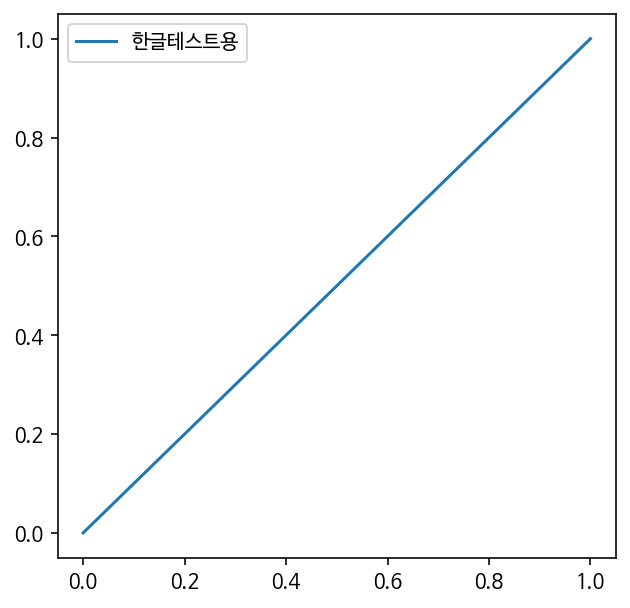

In [2]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

#라이브러리 설치

In [3]:
!pip install requests
!pip install bs4
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 4.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.3.0 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing inst

In [ ]:
from bs4 import BeautifulSoup

html='<div class="service_area"><a id="NM_set_home_btn" href="https://help.naver.com/support/welcomePage/guide.help" class="link_set" data-clk="top.mkhome">네이버를 시작페이지로</a><i class="sa_bar"></i><a href="https://jr.naver.com" class="link_jrnaver" data-clk="top.jrnaver"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a><a href="https://happybean.naver.com" class="link_happybin" data-clk="top.happybean"><i class="ico_happybin"></i><span class="blind">해피빈</span></a></div>'

In [ ]:
soup=BeautifulSoup(html, 'html.parser')

print(soup.prettify())

<div class="service_area">
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">
  네이버를 시작페이지로
 </a>
 <i class="sa_bar">
 </i>
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com">
  <i class="ico_jrnaver">
  </i>
  <span class="blind">
   쥬니어네이버
  </span>
 </a>
 <a class="link_happybin" data-clk="top.happybean" href="https://happybean.naver.com">
  <i class="ico_happybin">
  </i>
  <span class="blind">
   해피빈
  </span>
 </a>
</div>


In [ ]:
soup.a

<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>

In [ ]:
soup.find_all("a")

[<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>,
 <a class="link_happybin" data-clk="top.happybean" href="https://happybean.naver.com"><i class="ico_happybin"></i><span class="blind">해피빈</span></a>]

In [ ]:
from bs4 import BeautifulSoup

url = 'https://www.naver.com'
url_data = requests.get(url)
html=url_data.text
soup = BeautifulSoup(html, 'html.parser') #bs4 객체 생성

soup.prettify() 

with open('네이버.html', 'w', encoding='utf-8') as f :
    f.write(soup.prettify())

#뉴스 스탠드 언론사명 가져오기
#find_all() : 해당 하는 태그를 모두 찾아서 리스트로 반환
newsTags = soup.find_all('div', 
                         class_='thumb_box _NM_NEWSSTAND_THUMB _NM_NEWSSTAND_THUMB_press_valid')

for tag in newsTags :
    #find() : 원하는 태그를 딱 하나 찾아준다.
    imgTag = tag.find('img', class_='news_logo')
    #print(imgTag)
    print(imgTag['alt']) #이미지 태그의 속성값 중 alt 값을 가져옴
  
#-------------------------------------------------------
#select() : css 셀럭터 방식 태그의 경로를 통해서 원하는 태그 다 찾는다.
imgTags = soup.select('div.thumb_box._NM_NEWSSTAND_THUMB._NM_NEWSSTAND_THUMB_press_valid'
                     +' > a.thumb > img.news_logo')
for tag in imgTags :
    print(tag['alt'])


시사인
한겨레
마이데일리
스포츠서울
서울경제
뉴데일리
JTBC
세계일보
한국경제TV
스포츠조선
블로터
헤럴드경제
아시아경제
일간스포츠
인천일보
경인일보
경상일보
IT조선
인민망
조세일보
맥스무비
뉴스앤조이
스포츠춘추
시사인
한겨레
마이데일리
스포츠서울
서울경제
뉴데일리
JTBC
세계일보
한국경제TV
스포츠조선
블로터
헤럴드경제
아시아경제
일간스포츠
인천일보
경인일보
경상일보
IT조선
인민망
조세일보
맥스무비
뉴스앤조이
스포츠춘추


In [ ]:
import requests
from lxml import html

page = requests.get('https://movie.naver.com/movie/bi/mi/basic.naver?code=208431#story')
tree = html.fromstring(page.text)

text = tree.xpath('//*[@id="content"]/div[1]/div[4]/div[1]/div/div/p/text()')

print(text)

['어린이의 삶과 미래에 대해 인터뷰하는 라디오 저널리스트 조니.', '\xa0어머니의 죽음 이후 오랜 시간 등돌리고 살던 여동생 비브의 부탁으로', '\xa0육아 난이도 극상에 어디로 튈지 모르는 9살 조카 제시를 돌보게 된다.', '\xa0뜻하지 않게 즐거운 시간과 슬픔의 시간,', '\xa0조용한 밤과 흥미로운 낮 시간을 함께하게 된 둘.', '\xa0조니는 제시에게도 인터뷰를 시도하지만', '\xa0도리어 질문 세례를 받고 마음 깊은 곳에 숨겨둔 과거를 꺼내게 되는데...', '\xa0이 변화무쌍한 세상 속에 어쩐지 우리, 진짜 가족이 된 것만 같다!']


#매장 정보 찾기

In [ ]:
from bs4 import BeautifulSoup

itemList = []
for page in range(1, 53) :
    url = f'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo={page}&sido=&gugun=&store='
    url_data = requests.get(url)
    html=url_data.text
    soup = BeautifulSoup(html, 'html.parser') #bs4 객체 생성
    trs = soup.select('tbody')

    for tr in trs :
        tds = tr.find_all('td')
        # print(tds)
        itemDic = {}
        itemDic['지역'] = tds[0].text
        itemDic['매장명'] = tds[1].text
        itemDic['매장현황'] = tds[2].text #영업중, 오픈예정
        itemDic['주소'] = tds[3].text
        itemDic['매장 서비스'] = ''
        imgs = tds[4].find_all('img')
        if imgs != None :
            for img in imgs :
                itemDic['매장 서비스'] += img['alt'] + " "
        itemDic['매장 서비스'] = itemDic['매장 서비스'].strip()
        itemDic['전화번호'] = tds[5].text
        itemList.append(itemDic)

print('총 매장 개수 : ', len(itemList))
itemList

#------------------------------------------------------
#데이터 저장
#pip install pandas #대표적인 데이터 분석 관련 라이브러리
import pandas as pd
df = pd.DataFrame(itemList) #데이터프레임은 테이블 구조 
df.head() #가장 앞에 있는 5개 데이터 조회

#csv 파일 포맷으로 저장
df.to_csv('./홀리스 카페매장.csv', encoding='utf-8', index=False)
#index : 데이터프레임의 인덱스 저장 유무

#json 파일 포맷으로 저장
df.to_json('./홀리스 카페매장.json',
    orient='records', force_ascii=False, indent=4)
#force_ascii : 한글 저장하기 위해 False
#indent : 데이터 4칸 띄어서 저장 

총 매장 개수 :  52


#NC SOFT 주식 데이터 예측

In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 19.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.3.0 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 21.4 MB/s 
     |████████████████████████████████| 62 kB 26.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pandas_datareader import data
import datetime

import yfinance as yf
yf.pdr_override()

start_date = '2008-01-01'
name = '036570.KS'
nc = data.get_data_yahoo(name, start_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
nc.head(3)

Open     High      Low    Close     Adj Close  Volume
Date                                                                
2008-01-02  49000.0  50100.0  48600.0  48700.0  41816.457031   83601
2008-01-03  48650.0  49500.0  48500.0  49150.0  42202.847656   49680
2008-01-04  48700.0  49200.0  48000.0  48750.0  41859.390625   88832

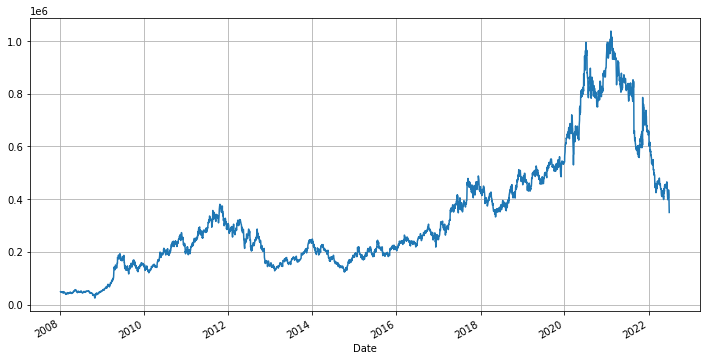

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

nc['Close'].plot(figsize=(12, 6), grid=True)

In [ ]:
nc_trunc = nc[:'2016-12-31']
nc_trunc.head(3)

df = pd.DataFrame({'ds':nc_trunc.index, 'y':nc_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head(3)

ds        y
0 2008-01-02  48700.0
1 2008-01-03  49150.0
2 2008-01-04  48750.0

In [ ]:
from fbprophet import Prophet

In [ ]:
from fbprophet import Prophet

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=365*2)
future.tail(3)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat     yhat_lower     yhat_upper
2971 2018-12-27  356861.426334  104493.013310  575919.969226
2972 2018-12-28  356725.505090  101201.060081  582006.989033
2973 2018-12-29  354866.960611  106512.517601  573172.886750

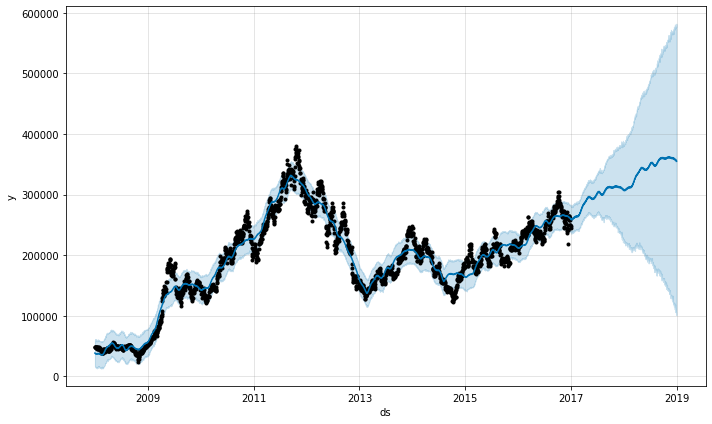

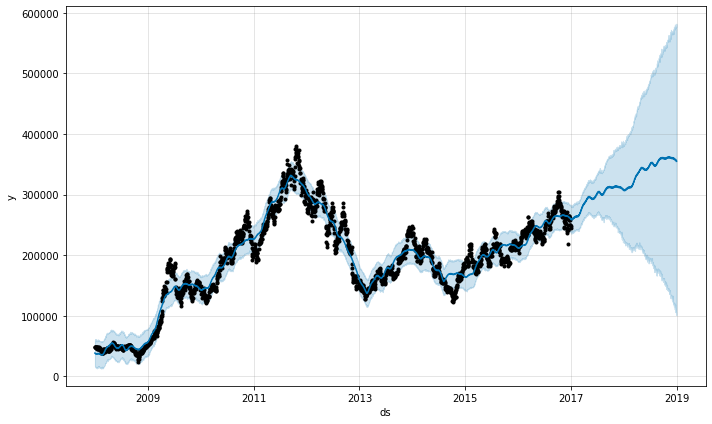

In [ ]:
m.plot(forecast)

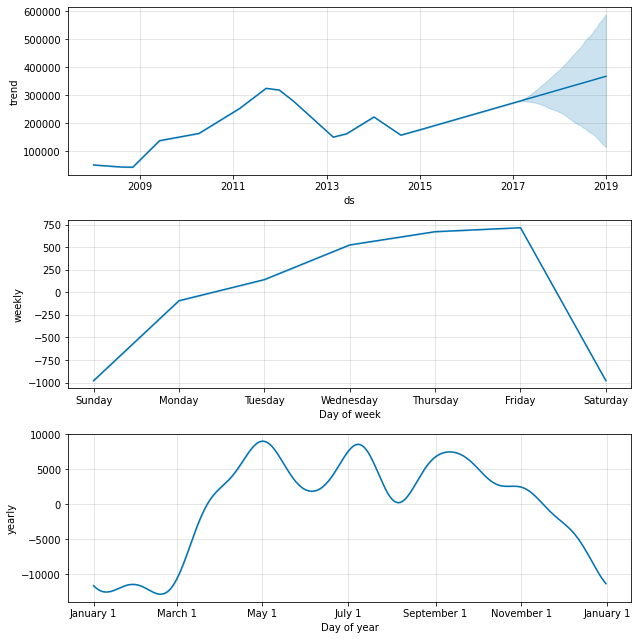

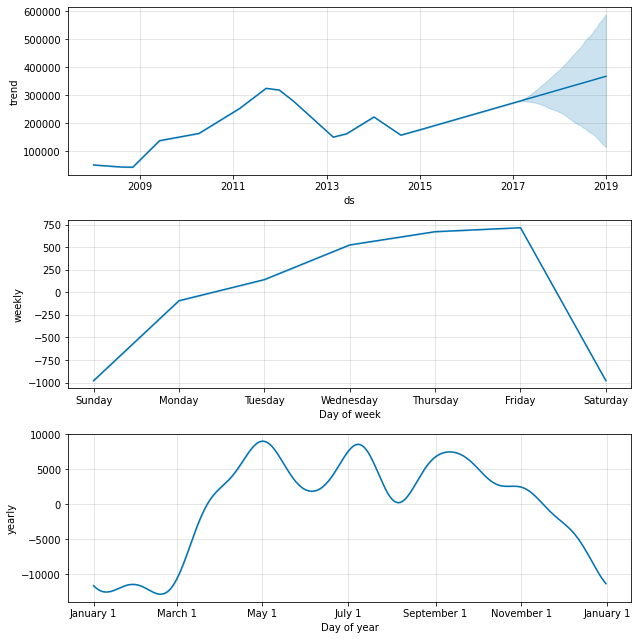

In [ ]:
m.plot_components(forecast)

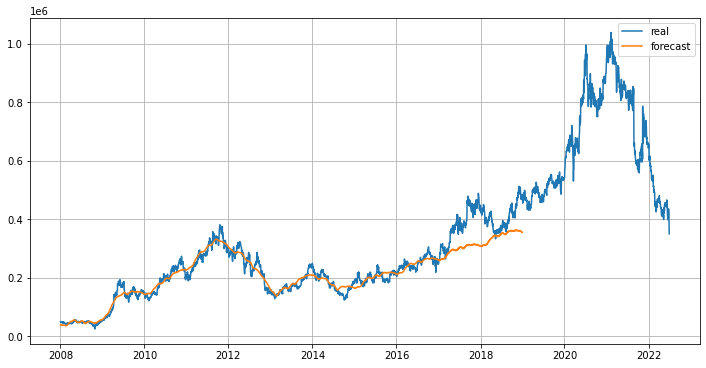

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(nc.index, nc['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()




# 도시별 현재날씨 확인하기


## 1.Gathering Data

### https://pythondojang.bitbucket.io/weather/observation/currentweather.html 에서 도시별 현재날씨 확인하기

In [ ]:
import requests                  # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup    # HTML을 파싱하는 모듈
 
# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듦
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('table', { 'class': 'table_develop3' })    # <table class="table_develop3">을 찾음
data = []                            # 데이터를 저장할 리스트 생성
for tr in table.find_all('tr'):      # 모든 <tr> 태그를 찾아서 반복(각 지점의 데이터를 가져옴)
    tds = list(tr.find_all('td'))    # 모든 <td> 태그를 찾아서 리스트로 만듦
                                     # (각 날씨 값을 리스트로 만듦)
    for td in tds:                   # <td> 태그 리스트 반복(각 날씨 값을 가져옴)
        if td.find('a'):             # <td> 안에 <a> 태그가 있으면(지점인지 확인)
            point = td.find('a').text    # <a> 태그 안에서 지점을 가져옴
            weather = tds[1].text # 날씨 
            temperature = tds[5].text    # <td> 태그 리스트의 여섯 번째(인덱스 5)에서 기온을 가져옴
            humidity = tds[9].text       # <td> 태그 리스트의 열 번째(인덱스 9)에서 습도를 가져옴
            data.append([point, weather, temperature, humidity])    # data 리스트에 지점, 기온, 습도를 추가
 
data    # data 표시. 주피터 노트북에서는 print를 사용하지 않아도 변수의 값이 표시됨

[['서울', '맑음', '25.6', '30'],
 ['백령도', '구름조금', '18.4', '62'],
 ['인천', '맑음', '20.8', '54'],
 ['수원', '구름조금', '25.0', '41'],
 ['동두천', '\xa0', '24.9', '34'],
 ['파주', '\xa0', '25.1', '39'],
 ['강화', '\xa0', '20.0', '56'],
 ['양평', '\xa0', '25.5', '32'],
 ['이천', '\xa0', '25.6', '28'],
 ['북춘천', '구름조금', '24.6', '36'],
 ['북강릉', '맑음', '19.9', '56'],
 ['울릉도', '구름많음', '16.8', '77'],
 ['속초', '\xa0', '19.1', '75'],
 ['철원', '\xa0', '23.9', '37'],
 ['대관령', '\xa0', '17.9', '49'],
 ['춘천', '\xa0', '25.7', '39'],
 ['강릉', '\xa0', '22.7', '41'],
 ['동해', '\xa0', '19.5', '77'],
 ['원주', '\xa0', '23.4', '36'],
 ['영월', '\xa0', '24.2', '34'],
 ['인제', '\xa0', '24.3', '31'],
 ['홍천', '\xa0', '25.4', '25'],
 ['태백', '\xa0', '19.6', '43'],
 ['정선군', '\xa0', '23.0', '32'],
 ['서산', '맑음', '23.6', '49'],
 ['청주', '구름조금', '24.3', '33'],
 ['대전', '맑음', '25.1', '37'],
 ['충주', '\xa0', '24.4', '32'],
 ['추풍령', '\xa0', '23.0', '35'],
 ['홍성(예)', '\xa0', '24.3', '46'],
 ['제천', '\xa0', '24.2', '32'],
 ['보은', '\xa0', '23.7', '28'],
 ['천안',

### 데이터를 csv 파일에 저장

In [ ]:
import pandas as pd

cn=['지점','현재일기','현재기온','습도']
w_list=pd.DataFrame(data, columns=cn)
w_list

지점  현재일기  현재기온  습도
0    서울    맑음  25.6  30
1   백령도  구름조금  18.4  62
2    인천    맑음  20.8  54
3    수원  구름조금  25.0  41
4   동두천        24.9  34
..  ...   ...   ...  ..
90   합천        25.1  32
91   밀양        24.7  34
92   산청        24.8  41
93   거제        23.1  57
94   남해        24.5  40

[95 rows x 4 columns]

In [ ]:
w_list.to_csv('Test.csv',encoding='utf-8-sig') #utf-8로 한글 저장 잘 됨

w_list.to_csv('Test.csv',encoding='euc-kr') #한글 저장 잘 됨

w_list.to_csv('Test.csv',encoding='utf-8') #한글 깨짐

### csv 파일 불러오기

In [ ]:
import pandas as pd

In [ ]:
weather=pd.read_csv('Test.csv')
weather.head()

Unnamed: 0   지점  현재일기  현재기온  습도
0           0   서울    맑음  25.6  30
1           1  백령도  구름조금  18.4  62
2           2   인천    맑음  20.8  54
3           3   수원  구름조금  25.0  41
4           4  동두천        24.9  34

### 열이름 변경

In [ ]:
weather=weather.rename(
    {'Unnamed: 0':'순번'},axis='columns'
)

In [ ]:
weather.head()

순번   지점  현재일기  현재기온  습도
0   0   서울    맑음  25.6  30
1   1  백령도  구름조금  18.4  62
2   2   인천    맑음  20.8  54
3   3   수원  구름조금  25.0  41
4   4  동두천        24.9  34

#### 열 위치 변경

In [ ]:
weather=weather[['순번', '지점', '현재기온', '습도', '현재일기']]
weather

순번   지점  현재기온  습도  현재일기
0    0   서울  25.6  30    맑음
1    1  백령도  18.4  62  구름조금
2    2   인천  20.8  54    맑음
3    3   수원  25.0  41  구름조금
4    4  동두천  24.9  34      
..  ..  ...   ...  ..   ...
90  90   합천  25.1  32      
91  91   밀양  24.7  34      
92  92   산청  24.8  41      
93  93   거제  23.1  57      
94  94   남해  24.5  40      

[95 rows x 5 columns]

## 2. 이상치 결측치 확인

In [ ]:
print("행, 열 : ", weather.shape)

행, 열 :  (95, 5)


#### 결측치 확인

X에 대한 결측치 확인

In [ ]:
X_null=weather.iloc[:,1:4].isnull().sum()

In [ ]:
if X_null.sum()==0:
    print("결측치가 없습니다.\n")
else:
    print("결측치가 있습니다.\n")
    print(X_null,"\n")

결측치가 없습니다.



y에 대한 결측치 확인

In [ ]:
y_null=weather.iloc[:,4:].isnull

In [ ]:
if y_null==0:
    print("결측치가 없습니다.\n")
else:
    print("결측치가 있습니다.\n")
    print(y_null,"\n")

결측치가 있습니다.

<bound method DataFrame.isnull of     현재일기
0     맑음
1   구름조금
2     맑음
3   구름조금
4       
..   ...
90      
91      
92      
93      
94      

[95 rows x 1 columns]> 



#### 이상치 확인은 해 보시길 바랄게요!!!

<AxesSubplot:>

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


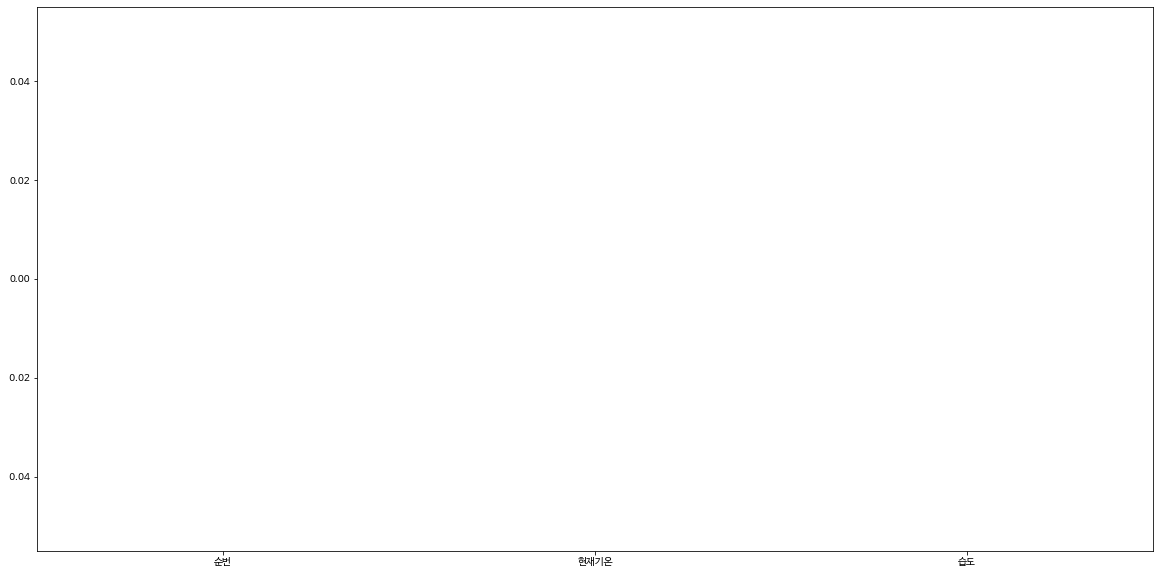

In [ ]:
weather.loc[:-1].plot.box(figsize=(20,10))

## 3. EDA 상관분석

In [ ]:
corr=weather[:-1].corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

<AxesSubplot:>

## 4. 특징 추출

(<AxesSubplot:title={'center':'현재기온'}>, Text(0.5, 1.0, '현재기온'))

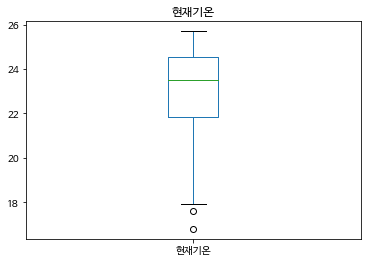

In [ ]:
weather.loc[:,'현재기온'].plot.box(), plt.title("현재기온")

In [ ]:
weather.loc[:,'습도'].plot.box(), plt.title("현재기온")

(<AxesSubplot:title={'center':'현재기온'}>, Text(0.5, 1.0, '현재기온'))